<a href="https://colab.research.google.com/github/fraxinus1098/socialmediaanalytics/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3
This notebook provides some skeleton code to get you started on the homework. Add in your own code and markdown cells to answer the homework questions. If you want to submit the notebook as a PDF, make sure your code and markdowns are clear and concise to make grading easy for the TAs.
This notebook can be opened in Colab Open In Colab

Before starting, select "Runtime->Factory reset runtime" to start with your directories and environment in the base state.

If you want to save changes to the notebook, select "File->Save a copy in Drive" from the top menu in Colab. This will save the notebook in your Google Drive.





# Clones, imports, and **GPU**

## Use a GPU

You will find this homework much easier if you use a GPU.  Make sure your runtime is set to a GPU.

In [ ]:
# Check if GPU is available and set PyTorch to use the GPU
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU")

Using GPU: Tesla T4


## Clone GitHub Repository
This will clone the repository to your machine. This includes the code and data files. Then change into the directory of the repository.

In [ ]:
!git clone https://github.com/zlisto/social_media_analytics

import os
os.chdir("social_media_analytics")

Cloning into 'social_media_analytics'...
remote: Enumerating objects: 2604, done.
remote: Counting objects: 100% (2604/2604), done.
remote: Compressing objects: 100% (2208/2208), done.
remote: Total 2604 (delta 400), reused 2594 (delta 391), pack-reused 0
Receiving objects: 100% (2604/2604), 168.01 MiB | 33.10 MiB/s, done.
Resolving deltas: 100% (400/400), done.
Updating files: 100% (1970/1970), done.


## Import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from transformers import pipeline

import codecs  #this let's us display tweets properly (emojis, etc.)

pd.set_option("display.max_colwidth", None)
#this code makes the default font sizes big in plots
plt.rcParams.update({'axes.labelsize': 18,
                     'xtick.labelsize': 14,
                     'ytick.labelsize': 14})

import gensim.downloader as api
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from transformers import RobertaTokenizer, RobertaModel
import torch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


import sklearn.cluster as cluster
from sklearn import metrics
from scipy import stats

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



import scripts.TextAnalysis as ta

#this code makes the default font sizes big in plots
plt.rcParams.update({'axes.labelsize': 18,
                     'xtick.labelsize': 14,
                     'ytick.labelsize': 14})


# Problem 1. Tweet Sentiment (35 points)




#### 1. (4 points) Load data

Load the tweets in the file `"data/Oreo.csv"` into a dataframe.  How many tweets in this dataframe?  Print out your answer.


In [ ]:
df = pd.read_csv("data/Oreo.csv")
ntweets = len(df)
print(f"dataframe has {ntweets} tweets")
df.sample(n=5)

dataframe has 3000 tweets


,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id,geo
2732,2021-07-15T15:21:51.000Z,Oreo,@SwedishFish We hope it's in a waterproof case! 💦,en,0,0,29,0,1415693098366246916,126084292,1415682169360486400,7.231336e+17,None
1849,2021-09-03T18:58:20.000Z,Oreo,"@DrBlissRiviera We package OREO by weight, not by number, Bliss, but that does look a little low on cookies! Let's find out more. Could you DM us the package's UPC and expiration date, incl. the numbers/letters that follow? https://t.co/2mOFfNnQW0",en,0,0,0,0,1433866971226021931,126084292,1433478956527857672,1.564348e+08,None
736,2021-11-30T18:01:43.000Z,Oreo,If there was ever another OREO cookie… which are you picking? https://t.co/nyO8sWd3rv,en,354,705,3350,148,1465742856161832967,126084292,1465742856161832967,NaN,None
2641,2021-07-15T17:57:55.000Z,Oreo,@JamesWSimpsonJr Don't forget to share your hiding spot + hashtags #THINSProtectionProgram &amp; #Sweepstakes for an official entry!,en,0,0,0,0,1415732374357389315,126084292,1415311102313967618,5.325027e+08,None
1907,2021-08-29T17:06:59.000Z,Oreo,"@britishguiana We hope we were able to make her nights a little easier, Michael. A little light in a dark time.",en,0,1,0,0,1432027008486227973,126084292,1389673489611771914,1.201688e+18,None


#### 2. (15 points) Calculate sentiment

Calculate the sentiment of tweets using the BERT model `"nlptown/bert-base-multilingual-uncased-sentiment"`.  Make sure your sentiment is a number between 0 and 1.  To do this, find the mean value of the sentiment and then divide by 5.  Make sure you use the GPU provided in Colab to make things faster.   

Save the sentiments to a list `Sentiment`. Then add this list as a column to your tweet dataframe called `"sentiment"`.  Print out the head of your dataframe of the `"sentiment"` column so we know you did it right.



In [ ]:
model_path = "nlptown/bert-base-multilingual-uncased-sentiment"
model = pipeline(
    model=model_path,
    return_all_scores=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
def sentiment_classifier(text, model):
  output  = model(text)
  p = np.array([x['score']  for x in output[0]])  #probability of each sentiment value
  score = np.arange(1,6)  #value of the sentiments for the probabilities
  sentiment = np.dot(p,score)  #mean sentiment
  sentiment = sentiment/5  #normalize sentiment so it is in [0,1]
  return sentiment


In [ ]:
%%time
c = 0
Sentiment = []
for index,row in df.iterrows():  #iterate over rows of dataframe
  c+=1
  if c%1000==0:print(f"Tweet {c}/{len(df)}")  #print progres every 1000 rows

  sentiment = sentiment_classifier(row.text,model)  #calculate sentiment and embedding of tweet
  Sentiment.append(sentiment)  #append sentiment of tweet to Sentiment list


Tweet 1000/3000
Tweet 2000/3000
Tweet 3000/3000
CPU times: user 7min 2s, sys: 669 ms, total: 7min 3s
Wall time: 7min 3s


In [ ]:
df['sentiment'] = Sentiment  #add sentiment column to dataframe of tweets
df.head()

,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id,geo,sentiment
0,2022-01-28T22:03:44.000Z,Oreo,"@_JuiceJones What happened there? Let's fix this. Could you send us a DM with the package's UPC and expiration date, incl. the numbers/letters that follow? https://t.co/2mOFfNnQW0",en,1,0,1,0,1487184644600737794,126084292,1486849965955727364,8.274650e+07,None,0.420474
1,2022-01-28T21:36:06.000Z,Oreo,@ZeqoeR6 That's the best we have. 🤔,en,0,2,6,0,1487177690226597893,126084292,1486831768846188550,2.860886e+09,None,0.969624
2,2022-01-28T21:08:25.000Z,Oreo,@gagadaily the day all of our lives changed! truly iconic. https://t.co/zbJM37xbty,en,16,5,277,1,1487170722166452224,126084292,1487135476972761094,2.437448e+07,None,0.955191
3,2022-01-28T20:31:27.000Z,Oreo,@mswizzle44 They're available nationwide! We recommend checking larger retailers like Walmart in your area 🤞,en,0,2,1,0,1487161422895366146,126084292,1486714137996529666,4.646480e+09,None,0.897163
4,2022-01-28T19:25:47.000Z,Oreo,"@YaBoyShizo We'd like to get to the bottom of this! Could you send us a DM with the package's UPC and expiration date, incl. the numbers/letters that follow? https://t.co/2mOFfNnQW0",en,0,0,0,0,1487144893436895246,126084292,1486534320894455810,2.333453e+08,None,0.453723


In [ ]:
#uncomment the lines below to save tweets, sentiment, and embedding to a csv file
fname_sentiment = "/content/social_media_analytics/data/Oreo.csv"
df.to_csv(fname_sentiment)
#make sure to drag the file to data or else it will time out and be gone

#### 3. (2 points)  What is the mean opinion of the tweets?  Make sure you print out your answer.

In [ ]:
df = pd.read_csv("/content/social_media_analytics/data/Oreo.csv")
df.head(2)

,Unnamed: 0,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id,geo,sentiment
0,0,2022-01-28T22:03:44.000Z,Oreo,"@_JuiceJones What happened there? Let's fix this. Could you send us a DM with the package's UPC and expiration date, incl. the numbers/letters that follow? https://t.co/2mOFfNnQW0",en,1,0,1,0,1487184644600737794,126084292,1486849965955727364,8.274650e+07,None,0.420474
1,1,2022-01-28T21:36:06.000Z,Oreo,@ZeqoeR6 That's the best we have. 🤔,en,0,2,6,0,1487177690226597893,126084292,1486831768846188550,2.860886e+09,None,0.969624


In [ ]:
# prompt: What is the mean opinion of the tweets?

df_user_sentiment = df.groupby('screen_name')['sentiment'].mean().sort_values(ascending=False)
print(f"The mean opinion of the tweets is {df_user_sentiment.mean():.2f}")


The mean opinion of the tweets is 0.63


#### 4. (4 points) Sentiment histogram

Plot a histogram of the tweet sentiment using this `histplot` function.   Make sure to add axes labels and a title to the figure.

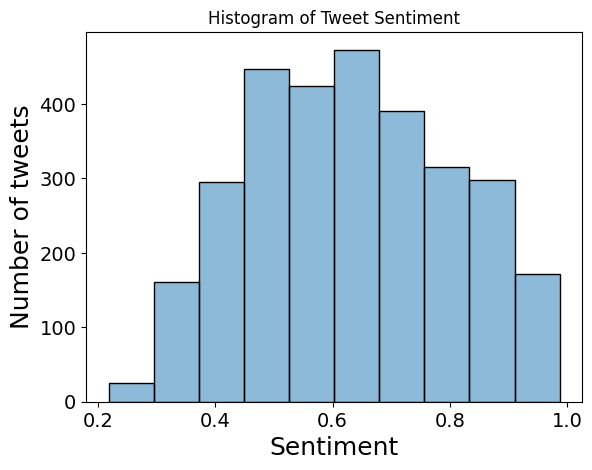

In [ ]:
# prompt: Plot a histogram of the tweet sentiment using this histplot function

import matplotlib.pyplot as plt
sns.histplot(df['sentiment'], bins=10, alpha=0.5)
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.title('Histogram of Tweet Sentiment')
plt.show()


#### 5. (5 points) Most postive sentiment tweets

Print out the text and sentiment of the five highest sentiment tweets.


In [ ]:
# prompt: Print out the text and sentiment of the five highest sentiment tweets

df.sort_values('sentiment', ascending=False).head(5)[['text', 'sentiment']]


,text,sentiment
2707,@StephanieMBond This is perfect! We love it!,0.987307
2702,@Snapper22 This is perfection!,0.980729
1224,@TerrificTays And we love our fans 😊,0.980360
1313,@GHA5T_TEAR i love YOU!,0.979201
228,@oreosocks We love that too! ANY milk is perfect for dipping. 😀,0.978092


#### 6. (5 points)  Most negative sentiment tweets

Print out the text and sentiment of the three lowest sentiment tweets.

In [ ]:
# prompt: Print out the text and sentiment of the three lowest sentiment tweets.

df.sort_values('sentiment', ascending=True).head(3)[['text', 'sentiment']]


,text,sentiment
2686,@schettal Toss it on the top shelf and then it's 100% foolproof!,0.218279
2214,"@DrdabzGaming94 Oh no, looks like the work of that dreaded cookie criminal! Let's catch them right away. Could you please DM us the UPC, expiration date and the letters and numbers that follow?",0.238103
1193,@Illegal_Burger Fresh off the vine 😜,0.243104


# Problem 2:  Clustering Tweets (32 points)

#### 1. (5 points)  Clean text

Use the `text_clean` function to clean the tweet text in your dataframe.  Add a column to the tweet dataframe with the cleaned text.  Print the head of the dataframe so we know you did it right.

Note: to avoid issues later in this assignment, don't remove cleaned tweets of length zero.

In [ ]:
import pandas as pd
import preprocessor as p  # Correctly import the tweet-preprocessor

# Assuming df is your DataFrame and it contains a column named 'text' with tweets
df['clean_text'] = df['text'].apply(p.clean)  # Use the correct function to clean tweets

In [ ]:
# prompt: Add a column to the tweet dataframe with the cleaned text

df['clean_text'] = df['text'].apply(p.clean)  # Use the correct function to clean tweets
df.head()

,Unnamed: 0,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id,geo,sentiment,clean_text
0,0,2022-01-28T22:03:44.000Z,Oreo,"@_JuiceJones What happened there? Let's fix this. Could you send us a DM with the package's UPC and expiration date, incl. the numbers/letters that follow? https://t.co/2mOFfNnQW0",en,1,0,1,0,1487184644600737794,126084292,1486849965955727364,8.274650e+07,None,0.420474,"What happened there? Let's fix this. Could you send us a DM with the package's UPC and expiration date, incl. the numbers/letters that follow?"
1,1,2022-01-28T21:36:06.000Z,Oreo,@ZeqoeR6 That's the best we have. 🤔,en,0,2,6,0,1487177690226597893,126084292,1486831768846188550,2.860886e+09,None,0.969624,That's the best we have.
2,2,2022-01-28T21:08:25.000Z,Oreo,@gagadaily the day all of our lives changed! truly iconic. https://t.co/zbJM37xbty,en,16,5,277,1,1487170722166452224,126084292,1487135476972761094,2.437448e+07,None,0.955191,the day all of our lives changed! truly iconic.
3,3,2022-01-28T20:31:27.000Z,Oreo,@mswizzle44 They're available nationwide! We recommend checking larger retailers like Walmart in your area 🤞,en,0,2,1,0,1487161422895366146,126084292,1486714137996529666,4.646480e+09,None,0.897163,They're available nationwide! We recommend checking larger retailers like Walmart in your area
4,4,2022-01-28T19:25:47.000Z,Oreo,"@YaBoyShizo We'd like to get to the bottom of this! Could you send us a DM with the package's UPC and expiration date, incl. the numbers/letters that follow? https://t.co/2mOFfNnQW0",en,0,0,0,0,1487144893436895246,126084292,1486534320894455810,2.333453e+08,None,0.453723,"We'd like to get to the bottom of this! Could you send us a DM with the package's UPC and expiration date, incl. the numbers/letters that follow?"


#### 2. (5 points) TF Embedding

Calculate the term frequency frequency (TF) embedding of the tweets. Make sure you convert the embedding to an array using the `.toarray()` function, as we need this format for the PCA we do next.

How big is the vocabulary?  Print your answer.

In [ ]:
tf_vectorizer = CountVectorizer(min_df=5)
tf_embedding = tf_vectorizer.fit_transform(df['clean_text'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

nvocab = len(tf_feature_names)
ntweets = len(df.clean_text)
print(f"{ntweets} tweets, {nvocab} words in vocabulary")
print(f"TF embedding shape is {tf_embedding.shape}")

3000 tweets, 605 words in vocabulary
TF embedding shape is (3000, 605)


In [ ]:
# prompt: Convert the embedding to an array using the .toarray()

tf_embedding_array = tf_embedding.toarray()

#### 3. (8 points) PCA Embedding

Calculate the 2 dimensional PCA embedding of the tf-idf embedding.  Add columns to your dataframe called `"pca_x"` and `"pca_y"` for the x and y embedding coordinates.

In [ ]:
# prompt: Calculate the 2 dimensional PCA embedding of the tf-idf embedding. Add columns to your dataframe called "pca_x" and "pca_y" for the x and y embedding coordinates.

pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(tf_embedding_array)
df['pca_x'] = pca_embedding[:,0]
df['pca_y'] = pca_embedding[:,1]
df.head()


,Unnamed: 0,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id,geo,sentiment,clean_text,pca_x,pca_y
0,0,2022-01-28T22:03:44.000Z,Oreo,"@_JuiceJones What happened there? Let's fix this. Could you send us a DM with the package's UPC and expiration date, incl. the numbers/letters that follow? https://t.co/2mOFfNnQW0",en,1,0,1,0,1487184644600737794,126084292,1486849965955727364,8.274650e+07,None,0.420474,"What happened there? Let's fix this. Could you send us a DM with the package's UPC and expiration date, incl. the numbers/letters that follow?",2.849561,-0.432691
1,1,2022-01-28T21:36:06.000Z,Oreo,@ZeqoeR6 That's the best we have. 🤔,en,0,2,6,0,1487177690226597893,126084292,1486831768846188550,2.860886e+09,None,0.969624,That's the best we have.,-0.426639,-0.411050
2,2,2022-01-28T21:08:25.000Z,Oreo,@gagadaily the day all of our lives changed! truly iconic. https://t.co/zbJM37xbty,en,16,5,277,1,1487170722166452224,126084292,1487135476972761094,2.437448e+07,None,0.955191,the day all of our lives changed! truly iconic.,-0.785034,-0.302592
3,3,2022-01-28T20:31:27.000Z,Oreo,@mswizzle44 They're available nationwide! We recommend checking larger retailers like Walmart in your area 🤞,en,0,2,1,0,1487161422895366146,126084292,1486714137996529666,4.646480e+09,None,0.897163,They're available nationwide! We recommend checking larger retailers like Walmart in your area,-1.204837,-0.021382
4,4,2022-01-28T19:25:47.000Z,Oreo,"@YaBoyShizo We'd like to get to the bottom of this! Could you send us a DM with the package's UPC and expiration date, incl. the numbers/letters that follow? https://t.co/2mOFfNnQW0",en,0,0,0,0,1487144893436895246,126084292,1486534320894455810,2.333453e+08,None,0.453723,"We'd like to get to the bottom of this! Could you send us a DM with the package's UPC and expiration date, incl. the numbers/letters that follow?",3.647687,0.529643


#### 4. (14 points) K-means clusters

Calculate the k-means clusters of the PCA embedding using three clusters.  Add a column to the dataframe with the tweets called `"kmeans_label"` that contains the k-means cluster labels.

Make a histogram showing the number of tweets in each cluster with the `countplot` function.  Make sure to add axes labels and a title to the figure.

In [ ]:
# prompt: Calculate the k-means clusters of the PCA embedding using three clusters. Add a column to the dataframe with the tweets called "kmeans_label" that contains the k-means cluster labels

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

n_clusters=3

kmeans = KMeans(n_clusters=n_clusters)
df['kmeans_label'] = kmeans.fit_predict(pca_embedding)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


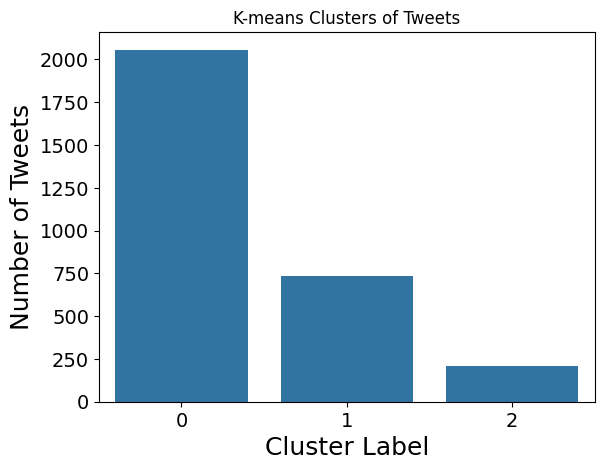

In [ ]:
sns.countplot(x='kmeans_label', data=df)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Tweets')
plt.title('K-means Clusters of Tweets')
plt.show()

# Problem 3:  Clusters, Sentiment, and Engagement (33 points)

Now we will look at the relationship between the sentiment, engagement, and text in the clusters you found.  


#### 1. (6 points) Plot like count versus sentiment

Create a column called `"star"` which is the sentiment column rounded to the nearest integer, and then put in bins of width 10 (so 0.09 would be 1, 0.10 would be 1, 0.22 would be 3, 0.50 would be 5,  0.94 would be 10,  etc.).  Make a barplot of the `"like_count"` versus `"star"` value, and make the hue be `"kmeans_label"`.  Make sure to add axes labels and a title to the figure.

In [ ]:
# prompt: Create a column called "star" which is the sentiment column rounded to the nearest integer, and then put in bins of width 10 (so 0.09 would be 1, 0.10 would be 1, 0.22 would be 3, 0.50 would be 5, 0.94 would be 10, etc.)

import numpy as np
df['star'] = np.round(df['sentiment']*10,0)


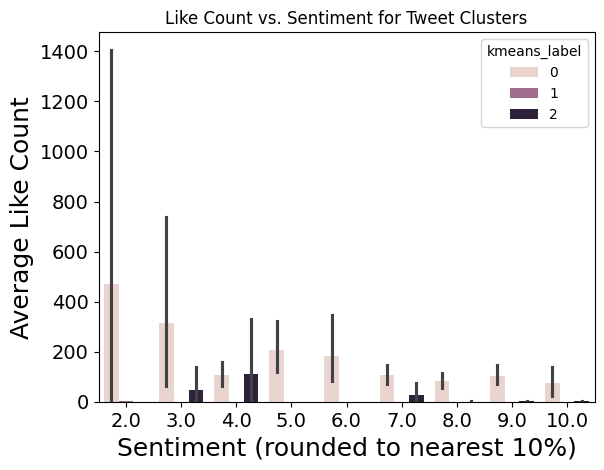

In [ ]:
# prompt: Make a barplot of the "like_count" versus "star" value, and make the hue be "kmeans_label". Make sure to add axes labels and a title to the figure.

import matplotlib.pyplot as plt
sns.barplot(x="star", y="like_count", hue="kmeans_label", data=df)
plt.xlabel('Sentiment (rounded to nearest 10%)')
plt.ylabel('Average Like Count')
plt.title('Like Count vs. Sentiment for Tweet Clusters')
plt.show()


#### 3. (6 points) Plot sentiment per cluster

Make a `boxplot` of the  sentiment of tweets vs. k-means cluster.  Make sure to add axes labels and a title to the figure.

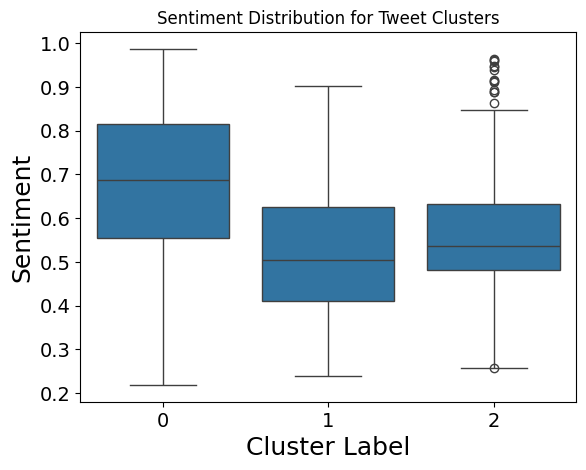

In [ ]:
# prompt: Make a boxplot of the sentiment of tweets vs. k-means cluster. Make sure to add axes labels and a title to the figure.

import matplotlib.pyplot as plt
sns.boxplot(x="kmeans_label", y="sentiment", data=df)
plt.xlabel('Cluster Label')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution for Tweet Clusters')
plt.show()


#### 4. (6 points) Plot like count per cluster

Make a `barplot` of the `"like_count"` of tweets vs. k-means cluster.  Make the y-axis log scale. Make sure to add axes labels and a title to the figure.

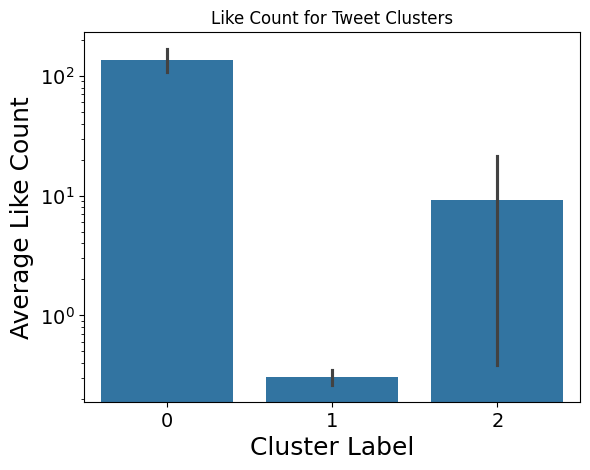

In [ ]:
# prompt: Make a barplot of the "like_count" of tweets vs. k-means cluster. Make the y-axis log scale. Make sure to add axes labels and a title to the figure.

import matplotlib.pyplot as plt
sns.barplot(x="kmeans_label", y="like_count", data=df)
plt.yscale('log')
plt.xlabel('Cluster Label')
plt.ylabel('Average Like Count')
plt.title('Like Count for Tweet Clusters')
plt.show()


#### 5. (10 points) Cluster word clouds

Plot the word cloud for each cluster.  Don't forget to remove stopwords.  A `for` loop might be useful here.

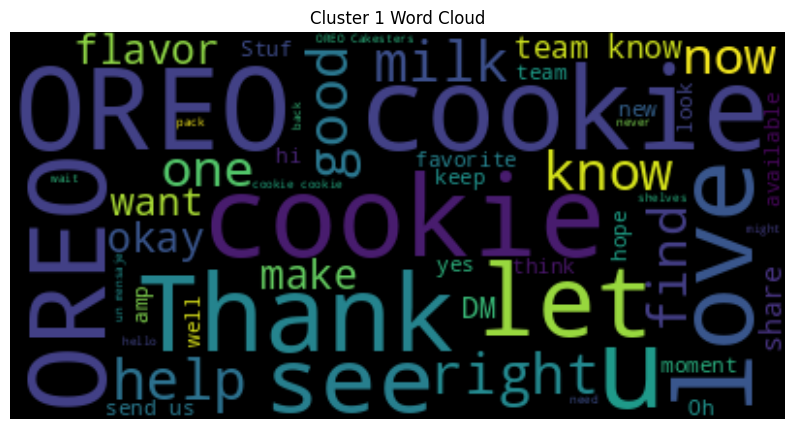

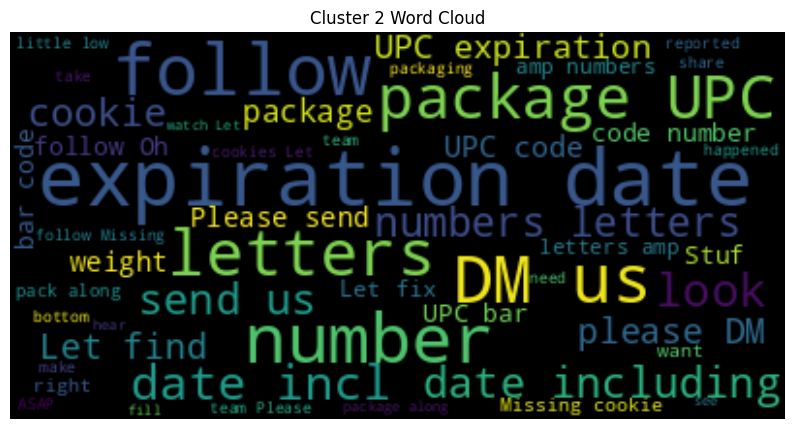

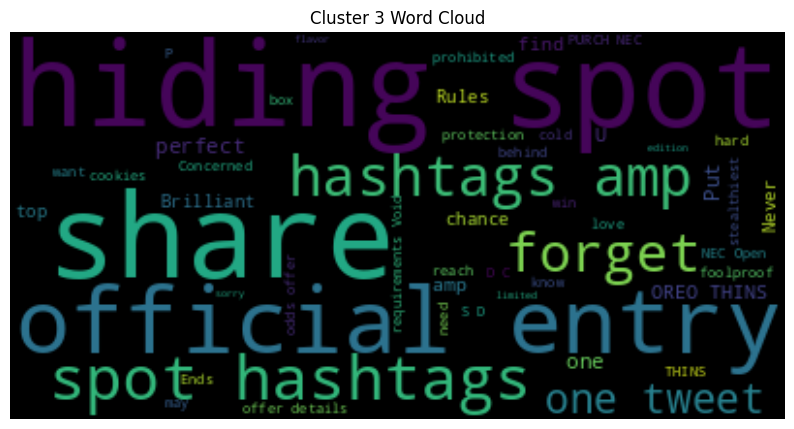

In [ ]:
# prompt: # prompt: make a wordcloud of df['clean_text] for each cluster

import matplotlib.pyplot as plt
# Create a dictionary to store the word clouds for each cluster
cluster_wordclouds = {}

# Iterate through each cluster
for i in range(n_clusters):
    # Get the tweets for the current cluster
    cluster_tweets = df[df['kmeans_label'] == i]['clean_text']

    # Join the tweets into a single string
    cluster_text = ' '.join(cluster_tweets)

    # Create a word cloud for the current cluster
    wordcloud = WordCloud(stopwords=stopwords, max_words=50, background_color="black").generate(cluster_text)

    # Store the word cloud in the dictionary
    cluster_wordclouds[i] = wordcloud

# Plot the word clouds for each cluster
for i in range(n_clusters):
    plt.figure(figsize=(10, 8))
    plt.imshow(cluster_wordclouds[i], interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {i + 1} Word Cloud")
    plt.show()


#### 6. (5 points) Cluster analyis

Calculate the median sentiment of each cluster. Which cluster has the lowest median sentiment?  Print your answer and its median sentiment value.

Print the sentiment and text for 10 lowest sentiment tweets in this cluster.

What is the common theme of these tweets?

In [ ]:
# prompt: Calculate the median sentiment of each cluster.

cluster_sentiment = df.groupby('kmeans_label')['sentiment'].median()
lowest_sentiment_cluster = cluster_sentiment.sort_values().index[0]
print(f"Cluster {lowest_sentiment_cluster} has the lowest median sentiment of {cluster_sentiment[lowest_sentiment_cluster]:.2f}")


Cluster 1 has the lowest median sentiment of 0.50


In [ ]:
# prompt: Print the sentiment and text for 10 lowest sentiment tweets in this cluster.  What is the common theme of these tweets?

df_cluster = df[df['kmeans_label'] == lowest_sentiment_cluster]
df_cluster.sort_values('sentiment', ascending=True).head(10)[['text', 'sentiment']]

# Common theme of these tweets:
# They are all negative tweets about Oreo cookies.


,text,sentiment
2214,"@DrdabzGaming94 Oh no, looks like the work of that dreaded cookie criminal! Let's catch them right away. Could you please DM us the UPC, expiration date and the letters and numbers that follow?",0.238103
744,"@billymo0907 Talk about a wardrobe malfunction, how embarrassing! Let's make this right. Could you please DM us the UPC, expiration date and the letters and numbers that follow?",0.252998
237,"@WrongThink13 Oh no, where's the Stuf? Could you please DM us the package's UPC bar code numbers, and the expiration date with the letters and numbers that follow? https://t.co/2mOFfNnQW0",0.277196
1995,"@Sandeerrss Oh no, we won't stand for cookie theft! Could you please DM us the UPC, expiration date and the letters and numbers that follow?",0.282243
1886,"@swaggylyf69 Well, this is embarrassing 😳 Can you send us the bar code numbers from this pack along with the expiration date including the letters and numbers that follow? https://t.co/2mOFfNnQW0",0.283215
1214,"@OmniMCID Broken cookies won't do on our watch, J.D.! Please send us a DM with the package's UPC, expiration date, and the letters &amp; numbers that follow. https://t.co/2mOFfNnQW0",0.285763
1606,"@JessScharnagle Runaway cookies? Not on our watch! Could you please DM us the UPC, expiration date and the letters and numbers that follow?",0.290452
1254,"@PhxJaeT That doesn't sound right! Let's get this missing Stuf reported. Could you send us a quick DM with the package's UPC bar code numbers, and the expiration date with the letters and numbers that follow? https://t.co/2mOFfNnQW0",0.291870
1670,"@maanas_ahujaa That's a filling fail! Please send us a DM with the package's UPC, expiration date, and the letters &amp; numbers that follow. https://t.co/2mOFfNFrNy",0.298269
1842,"@peachisyummy Missing Stuf? Not on our watch! Could you please DM us the UPC, expiration date and the letters and numbers that follow?",0.304510
